# Simulación ecuaciones furuta¶

1 . Cargamos librerias

In [19]:
import time
import torch
from numpy import sin, cos
#probamos impacto de tau
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import vlib_15_05_23 as vlib1 
import matplotlib.animation as animation
import openpyxl
import control as ct

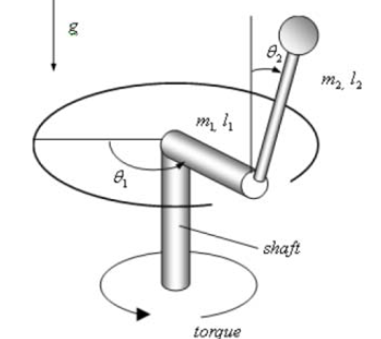

2 Cargamos parámetros de entrada

In [20]:
t0 = time.time()
# Motor
M1 = 1.1357 # masa del brazo en kg 
L1 = 0.215  # longitud del brazo
l1 = L1/2  # radio al centro de  masa del brazo
#J1 =(M1*L1*L1)/3 #1.75e-2
J1=1.75e-2

referencia=0 #Nm
# Pendulo
M2 = 5.38e-2 # masa del pendulo in kg 
L2 =  0.113*2 # longitud del pendulo in m 
l2 = L2/2  # radio al centro del pendulo
#J2 = (M2*L2*L2)/3# 1.98e-4
J2=1.98e-4
G = 9.81  # acceleracion  en m/s^2

tau1=1
tau2=0

3. Parametros de tiempo

In [21]:
DT=0.053
#DT=0.001
t = np.arange(0.0, 100.0, DT)
#print("t",t)

4. Condiciones iniciales

In [22]:
# Initial conditions
q1 = 0  # angulo del motor grados
#q1d = 0.1*180/3.141592654  # velocidad inicial del  motor
q1d =0  # velocidad inicial del  motor
q2 = 0  # angulo del  pendulo grados
q2d = 0.0  #  velocidad inicial del  pendulo
# estado inicial
state = np.radians([q1, q1d, q2, q2d])
print("state",state)

kw=1
ke=480
ktheta=1
kdelta=1
#state[0]=angulo del brazo q1
#state[1]=velocidad del brazo dq1
#state[2]=angulo del pendulo q2
#state[3]=velocidad del pendulo dq2

state [0. 0. 0. 0.]


5 llamamos a la subrutina para realizar las ecuaciones diferenciales

In [23]:
       

tautotal=[]
angulobrazo=[]
velocidadbrazo=[]
velocidadpendulo=[]
angulopendulo=[]
Energia=[]
print("tau",tau1)
for ic in range(len(t)):
    
    tinicial=t[ic]
    tfinal=t[ic]+DT
    ta = np.linspace(tinicial, tfinal, 2)
   
    
    print("tau",tau1)
    y = integrate.odeint(vlib1.derivs,state, ta,args=(M2,M1,L1,L2,J1,J2,G,l1,l2,tau1,tau2))# ecuacion diferencial estados
    print("y",y)
    #---------------------------------------------------------
    
   
   #----------------------------------------------------------------------------------
    state=[y[1,0],y[1,1],y[1,2],y[1,3]]
    
    tau1,E =vlib1.fqq(state,M2,M1,L1,L2,J1,J2,G,l1,l2,kw,ke,ktheta,kdelta)
    
    angulobrazo.append(y[1,0])
    angulopendulo.append(y[1,2])
    velocidadbrazo.append(y[1,1])
    velocidadpendulo.append(y[1,3])
    
    tautotal.append(tau1)
    Energia.append(E)
    
    
t1 = time.time()
print(t1-t0)


tau 1
tau 1
y [[ 0.          0.          0.          0.        ]
 [ 0.07788497  2.94167347 -0.11687819 -4.48516174]]
Energia=  0.07788496887875627
V 5.7856108378929525
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.036194830981602436
y [[ 0.07788497  2.94167347 -0.11687819 -4.48516174]
 [ 0.23170079  2.86596426 -0.37195896 -5.30524649]]
Energia=  0.07231763079767574
V 5.388879733404257
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.042112463095016574
y [[ 0.23170079  2.86596426 -0.37195896 -5.30524649]
 [ 0.38105884  2.76120324 -0.6962641  -7.09827431]]
Energia=  0.06602779789300176
V 4.931045423425844
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.03168395162583374
y [[ 0.38105884  2.76120324 -0.6962641  -7.09827431]
 [ 0.52290403  2.55543303 -1.14172616 -9.85040947]]
Energia=  0.06153358457620278
V 4.310564972

y [[-0.02371463 -1.32759451 -2.36261316 10.78158375]
 [-0.08927399 -1.12884969 -1.86325805  7.89854975]]
Energia=  -0.032731985617265855
V 0.8982676264316184
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.18248124904578494
y [[-0.08927399 -1.12884969 -1.86325805  7.89854975]
 [-0.14156636 -0.81171308 -1.53573218  4.41563597]]
Energia=  -0.04227436323817131
V 0.7683688069905992
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.0727920418802156
y [[-0.14156636 -0.81171308 -1.53573218  4.41563597]
 [-0.18005928 -0.62506205 -1.39658409  0.8355283 ]]
Energia=  -0.045076342441434686
V 0.699212354209014
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.004607439618148153
y [[-0.18005928 -0.62506205 -1.39658409  0.8355283 ]
 [-0.21192048 -0.58250826 -1.44592213 -2.70012397]]
Energia=  -0.04522314132970227
V 0.6829448868520706
V(

y [[ 0.18121382  0.04129504 -4.31823899 -1.98138518]
 [ 0.17250918 -0.37174945 -4.34097367  1.12918991]]
Energia=  -0.07909831737740312
V 1.5855490487079527
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.11868550275511275
y [[ 0.17250918 -0.37174945 -4.34097367  1.12918991]
 [ 0.14719197 -0.5726649  -4.19752146  4.2478765 ]]
Energia=  -0.07609353212703501
V 1.5644594328338
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.1799911708197399
y [[ 0.14719197 -0.5726649  -4.19752146  4.2478765 ]
 [ 0.10884381 -0.86479463 -3.9014273   6.80796285]]
Energia=  -0.06919120167242081
V 1.52883973501698
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.18606432357541802
y [[ 0.10884381 -0.86479463 -3.9014273   6.80796285]
 [ 0.05501462 -1.18167374 -3.49499039  8.28801623]]
Energia=  -0.05917551218746933
V 1.5401076192196508
V(0) 3

y [[ 0.17130823 -0.38962744 -4.32086527  0.99261054]
 [ 0.14452256 -0.61122669 -4.18577649  4.06905186]]
Energia=  -0.07682422956756509
V 1.613713356410081
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.17584696218682855
y [[ 0.14452256 -0.61122669 -4.18577649  4.06905186]
 [ 0.10427907 -0.89817656 -3.89959404  6.61602465]]
Energia=  -0.06974753524860516
V 1.5763301058818107
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.17967367771076054
y [[ 0.10427907 -0.89817656 -3.89959404  6.61602465]
 [ 0.04900999 -1.2013432  -3.50283162  8.12281244]]
Energia=  -0.05981713862579313
V 1.5815553460686014
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.07101986275169475
y [[ 0.04900999 -1.2013432  -3.50283162  8.12281244]
 [-0.01753197 -1.3441657  -3.05680009  8.39835156]]
Energia=  -0.055091339026034775
V 1.631957747306185
V

y [[ 0.12151569  1.08766862 -3.87259962 -6.48248021]
 [ 0.16594992  0.58392068 -4.15957827 -4.21227863]]
Energia=  -0.07792271488503195
V 1.6415192457358205
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.28561963408362673
y [[ 0.16594992  0.58392068 -4.15957827 -4.21227863]
 [ 0.18033895 -0.04970835 -4.31095033 -1.44280403]]
Energia=  -0.08203250451515096
V 1.6325361589191447
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.18280692532535786
y [[ 0.18033895 -0.04970835 -4.31095033 -1.44280403]
 [ 0.16725404 -0.44381924 -4.30573806  1.63748997]]
Energia=  -0.07964049314850186
V 1.6347006707567004
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.12967850570952477
y [[ 0.16725404 -0.44381924 -4.30573806  1.63748997]
 [ 0.13765943 -0.66144565 -4.13773981  4.65467639]]
Energia=  -0.07580270901735638
V 1.6072824006087008


y [[ 0.17968995 -0.16171836 -4.3231424  -0.82761239]
 [ 0.16235165 -0.48963936 -4.28434248  2.28100707]]
Energia=  -0.07902241309222909
V 1.6317424085243202
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.1383042694324937
y [[ 0.16235165 -0.48963936 -4.28434248  2.28100707]
 [ 0.1300826  -0.71569727 -4.08409404  5.21457552]]
Energia=  -0.07455946530959741
V 1.5987593585998219
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.19310888698758072
y [[ 0.1300826  -0.71569727 -4.08409404  5.21457552]
 [ 0.08361598 -1.03609712 -3.74621873  7.3733283 ]]
Energia=  -0.06558635126885785
V 1.5726211098119032
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.14387034907954097
y [[ 0.08361598 -1.03609712 -3.74621873  7.3733283 ]
 [ 0.02276581 -1.28485795 -3.32131581  8.38545586]]
Energia=  -0.05683181689221323
V 1.6008544208701303
V

y [[ 0.1217226  -0.77615303 -4.02452989  5.74048992]
 [ 0.07209982 -1.09978666 -3.66389038  7.68116408]]
Energia=  -0.06345935357437563
V 1.573866031743725
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.12054442350577357
y [[ 0.07209982 -1.09978666 -3.66389038  7.68116408]
 [ 0.00890409 -1.31411935 -3.22899749  8.43835627]]
Energia=  -0.05584146213180932
V 1.6118790102969685
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.018013888631458554
y [[ 0.00890409 -1.31411935 -3.22899749  8.43835627]
 [-0.06010707 -1.32312003 -2.78652246  7.9555366 ]]
Energia=  -0.05708462148725327
V 1.6592066972238857
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.15632970830296677
y [[-0.06010707 -1.32312003 -2.78652246  7.9555366 ]
 [-0.12333297 -1.0755132  -2.39962054  6.42011085]]
Energia=  -0.06696870916769453
V 1.662323759146441
V(0

y [[-0.16733449  0.44301441 -1.97715222 -1.62647683]
 [-0.13778414  0.6606023  -2.14459241 -4.64484061]]
Energia=  -0.07582203831781459
V 1.6074454934416467
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.18647742387724497
y [[-0.13778414  0.6606023  -2.14459241 -4.64484061]
 [-0.09447975  0.9675366  -2.45707939 -7.01006748]]
Energia=  -0.06774674696615371
V 1.5740359647129254
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.16409107956244928
y [[-0.09447975  0.9675366  -2.45707939 -7.01006748]
 [-0.03631597  1.24675181 -2.86893677 -8.27651002]]
Energia=  -0.05820259059551963
V 1.590864436374375
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.04242395583496437
y [[-0.03631597  1.24675181 -2.86893677 -8.27651002]
 [ 0.03150191  1.3477796  -3.31647129 -8.29880146]]
Energia=  -0.05532548901552385
V 1.643369444364451
V(0) 

y [[-0.13266579 -1.0059437  -2.34300843  6.07532041]
 [-0.17162877 -0.45717065 -2.08122118  3.68573349]]
Energia=  -0.07954504707874864
V 1.6378102021843728
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.27556253386144414
y [[-0.17162877 -0.45717065 -2.08122118  3.68573349]
 [-0.179711    0.1599338  -1.96019403  0.8382011 ]]
Energia=  -0.08177220764020827
V 1.6337439790273434
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.15859134898925023
y [[-0.179711    0.1599338  -1.96019403  0.8382011 ]
 [-0.16244103  0.48889171 -1.99842024 -2.27008954]]
Energia=  -0.07903333922534433
V 1.6318055871088097
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.13812234374396115
y [[-0.16244103  0.48889171 -1.99842024 -2.27008954]
 [-0.13021789  0.71471933 -2.198127   -5.20530465]]
Energia=  -0.07458260414602996
V 1.5989057695111737
V(0

y [[ 0.14916784  0.84190817 -4.04445214 -5.31821901]
 [ 0.17790339  0.23339289 -4.26062923 -2.74891696]]
Energia=  -0.0814049861933233
V 1.6334861550854702
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.24294148895676665
y [[ 0.17790339  0.23339289 -4.26062923 -2.74891696]
 [ 0.1759693  -0.31134831 -4.32830455  0.21650597]]
Energia=  -0.0809351158235519
V 1.6360697966791502
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.13198198328354538
y [[ 0.1759693  -0.31134831 -4.32830455  0.21650597]
 [ 0.1526759  -0.56040576 -4.23371508  3.3282586 ]]
Energia=  -0.07786080719032469
V 1.6236355425134161
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.15941947288795152
y [[ 0.1526759  -0.56040576 -4.23371508  3.3282586 ]
 [ 0.11582634 -0.81850282 -3.98245206  6.06419396]]
Energia=  -0.07198627006840932
V 1.5853668418104112
V(

y [[ 0.13790748 -0.65973607 -4.13945177  4.63503156]
 [ 0.09465526 -0.96636967 -3.82740803  7.00355992]]
Energia=  -0.06778235244420389
V 1.5740823292540962
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.16439405337726543
y [[ 0.09465526 -0.96636967 -3.82740803  7.00355992]
 [ 0.03653865 -1.24604528 -3.41579354  8.27421356]]
Energia=  -0.05822832850844824
V 1.590711132032389
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.04292496469427479
y [[ 0.03653865 -1.24604528 -3.41579354  8.27421356]
 [-0.0312614  -1.34780928 -2.9682652   8.30087004]]
Energia=  -0.05531801485562521
V 1.6432034335991688
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.101419184444212
y [[-0.0312614  -1.34780928 -2.9682652   8.30087004]
 [-0.09851074 -1.2124265  -2.55127022  7.17161582]]
Energia=  -0.06213838910154806
V 1.6665242477038165
V(0)

y [[ 0.16253015 -0.48814299 -4.28518578  2.25917032]
 [ 0.13035293 -0.7137429  -4.08602096  5.19602458]]
Energia=  -0.0746056718632833
V 1.599051914603727
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.19297748779975912
y [[ 0.13035293 -0.7137429  -4.08602096  5.19602458]
 [ 0.08399345 -1.03384902 -3.74896095  7.36196846]]
Energia=  -0.0656593386863639
V 1.572625048408041
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.1446103175719526
y [[ 0.08399345 -1.03384902 -3.74896095  7.36196846]
 [ 0.02322875 -1.28371407 -3.32444839  8.38270413]]
Energia=  -0.056872137967528845
V 1.6004963068353113
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.013165539731539428
y [[ 0.02322875 -1.28371407 -3.32444839  8.38270413]
 [-0.04540364 -1.34109838 -2.87795419  8.15554298]]
Energia=  -0.055968556587271526
V 1.6520982092275127
V(

y [[ 0.0093841  -1.31326325 -3.23215187  8.43744002]
 [-0.0596228  -1.32389816 -2.78949736  7.96290867]]
Energia=  -0.05704088100234851
V 1.6590095203285125
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.1554594831029148
y [[-0.0596228  -1.32389816 -2.78949736  7.96290867]
 [-0.12293634 -1.07820594 -2.40201821  6.43384727]]
Energia=  -0.06688357156184828
V 1.6624396068300098
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.25712798770517614
y [[-0.12293634 -1.07820594 -2.40201821  6.43384727]
 [-0.16672175 -0.56861476 -2.11807888  4.14834586]]
Energia=  -0.07814202924588227
V 1.6410418582760207
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.2847535504398902
y [[-0.16672175 -0.56861476 -2.11807888  4.14834586]
 [-0.18032336  0.06401793 -1.97040534  1.36892499]]
Energia=  -0.08201513694034933
V 1.632663250444831
V(0) 3

y [[-0.03676123  1.24533652 -2.8658472  -8.27190168]
 [ 0.03102087  1.34783607 -3.31336854 -8.30292439]]
Energia=  -0.05531066672947137
V 1.643036946914676
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.10093652084116073
y [[ 0.03102087  1.34783607 -3.31336854 -8.30292439]
 [ 0.09829382  1.21336966 -3.73057642 -7.17729206]]
Energia=  -0.062100966010070854
V 1.6665309958144494
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.22101149636295053
y [[ 0.09829382  1.21336966 -3.73057642 -7.17729206]
 [ 0.1518507   0.80822845 -4.06225181 -5.16944959]]
Energia=  -0.07393765298139407
V 1.6501723004756987
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.28707228261042267
y [[ 0.1518507   0.80822845 -4.06225181 -5.16944959]
 [ 0.17859618  0.19183498 -4.26960716 -2.56965755]]
Energia=  -0.0816155396399018
V 1.6330117414075498
V

y [[-0.13183854  0.70301537 -2.18658019 -5.0922084 ]
 [-0.08607343  1.02127818 -2.51906308 -7.29779964]]
Energia=  -0.06606476621928273
V 1.572701676089019
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.14864960153845086
y [[-0.08607343  1.02127818 -2.51906308 -7.29779964]
 [-0.02578995  1.27718491 -2.94134665 -8.36627417]]
Energia=  -0.05710365323578492
V 1.5985317444228557
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.018846309549323013
y [[-0.02578995  1.27718491 -2.94134665 -8.36627417]
 [ 0.04271887  1.34315628 -3.38825377 -8.18675765]]
Energia=  -0.05581251586410106
V 1.6505557037805632
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.12398074213802487
y [[ 0.04271887  1.34315628 -3.38825377 -8.18675765]
 [ 0.10865435  1.16365683 -3.7943481  -6.88932489]]
Energia=  -0.06398724682898922
V 1.6655997575988868
V(

y [[ 6.66818634e-02 -1.12662884e+00 -3.62586226e+00  7.80303219e+00]
 [ 2.54555909e-03 -1.32443710e+00 -3.18741658e+00  8.44460105e+00]]
Energia=  -0.05552646984605372
V 1.6170353822062162
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.03154634138045576
y [[ 2.54555909e-03 -1.32443710e+00 -3.18741658e+00  8.44460105e+00]
 [-6.64672761e-02 -1.31165811e+00 -2.74760065e+00  7.85356464e+00]]
Energia=  -0.05770357263624861
V 1.6615610053533083
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.16761779361709636
y [[-0.06646728 -1.31165811 -2.74760065  7.85356464]
 [-0.12847241 -1.03877007 -2.36852323  6.23572457]]
Energia=  -0.06809673682809496
V 1.6606939466630295
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.26420363964577015
y [[-0.12847241 -1.03877007 -2.36852323  6.23572457]
 [-0.16959875 -0.50667537 -2.09687891  3.89

y [[-0.18012116 -0.04119765 -1.98559809  1.88941789]
 [-0.17050195  0.40583898 -1.96611128 -1.15919077]]
Energia=  -0.08008025595376364
V 1.6359714705501496
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.12667284617464852
y [[-0.17050195  0.40583898 -1.96611128 -1.15919077]
 [-0.14290166  0.62529862 -2.10972874 -4.2215186 ]]
Energia=  -0.07658404822421351
V 1.6133375692444434
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.17886033758438652
y [[-0.14290166  0.62529862 -2.10972874 -4.2215186 ]
 [-0.10178556  0.91780337 -2.40290662 -6.72169462]]
Energia=  -0.06923001059870004
V 1.5766323122333947
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.17577826833353682
y [[-0.10178556  0.91780337 -2.40290662 -6.72169462]
 [-0.045678    1.21483405 -2.80375361 -8.16539147]]
Energia=  -0.059367522346600685
V 1.584834773762013
V(0

y [[ 0.13210849  1.01046985 -3.93677337 -6.0972173 ]
 [ 0.17136722  0.46389246 -4.19990149 -3.71357348]]
Energia=  -0.07946969045825171
V 1.637985076016777
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.2762570238392815
y [[ 0.17136722  0.46389246 -4.19990149 -3.71357348]
 [ 0.17977191 -0.15455213 -4.32252639 -0.86994608]]
Energia=  -0.08179154697170776
V 1.6336678672194525
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.15972332042226842
y [[ 0.17977191 -0.15455213 -4.32252639 -0.86994608]
 [ 0.16270779 -0.4866431  -4.28602109  2.23732528]]
Energia=  -0.07906600979310018
V 1.6319918037379781
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.13758278074922276
y [[ 0.16270779 -0.4866431  -4.28602109  2.23732528]
 [ 0.13062233 -0.71179571 -4.08794108  5.17743431]]
Energia=  -0.07465160249572139
V 1.5993444868578093
V(

y [[-6.47786153e-02  1.13562477e+00 -2.67062015e+00 -7.84280351e+00]
 [-3.34355480e-04  1.32758507e+00 -3.11015943e+00 -8.44424775e+00]]
Energia=  -0.05543724994436232
V 1.6188303942975921
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.03621643073350827
y [[-3.34355480e-04  1.32758507e+00 -3.11015943e+00 -8.44424775e+00]
 [ 6.86551994e-02  1.30716377e+00 -3.54892890e+00 -7.81621043e+00]]
Energia=  -0.057935805617915635
V 1.6622691510576069
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.171445063187968
y [[ 0.0686552   1.30716377 -3.5489289  -7.81621043]
 [ 0.13020916  1.02551062 -3.9252056  -6.17047686]]
Energia=  -0.068488929693582
V 1.6600892645127923
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.26633122679206006
y [[ 0.13020916  1.02551062 -3.9252056  -6.17047686]
 [ 0.17045645  0.48646571 -4.19283049 -3.80

y [[ 0.16950257  0.5088843  -4.18558195 -3.90002361]
 [ 0.18009994 -0.1172056  -4.31892616 -1.08317435]]
Energia=  -0.08190697093680278
V 1.6331870243075384
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.16776149048232533
y [[ 0.18009994 -0.1172056  -4.31892616 -1.08317435]
 [ 0.16445781 -0.4712586  -4.29401649  2.01592737]]
Energia=  -0.07928282411370688
V 1.6331494062462082
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.13420706001440144
y [[ 0.16445781 -0.4712586  -4.29401649  2.01592737]
 [ 0.13329657 -0.69252115 -4.1069741   4.9872151 ]]
Energia=  -0.07510076542726067
V 1.6023067506836306
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.19107542988642082
y [[ 0.13329657 -0.69252115 -4.1069741   4.9872151 ]
 [ 0.0881235  -1.00859181 -3.77914494  7.23188824]]
Energia=  -0.0664693039318564
V 1.5728719987454278
V

y [[-0.14759517  0.59399705 -2.07962882 -3.80660583]
 [-0.10851189  0.87058718 -2.35353048 -6.4243891 ]]
Energia=  -0.0705742824240548
V 1.5802234767448153
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.1844694661942613
y [[-0.10851189  0.87058718 -2.35353048 -6.4243891 ]
 [-0.05445127  1.1808467  -2.74257945 -8.03372487]]
Energia=  -0.06060175215907934
V 1.580099300601308
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.08287065481239157
y [[-0.05445127  1.1808467  -2.74257945 -8.03372487]
 [ 0.01147611  1.34060928 -3.18676595 -8.42077259]]
Energia=  -0.05513830813995933
V 1.6283383934627667
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.060919498083013154
y [[ 0.01147611  1.34060928 -3.18676595 -8.42077259]
 [ 0.08012917  1.27856375 -3.61888625 -7.59969879]]
Energia=  -0.059320619242107145
V 1.665117582323558
V(0)

y [[ 0.16639983  0.57508213 -4.16278296 -4.17532018]
 [ 0.18033318 -0.05800941 -4.31201683 -1.40009224]]
Energia=  -0.08202322201316013
V 1.6326167210166636
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.18094221230575805
y [[ 0.18033318 -0.05800941 -4.31201683 -1.40009224]
 [ 0.16693338 -0.44721625 -4.30445672  1.68273398]]
Energia=  -0.07959863383179334
V 1.6345607647272007
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.1301300512201425
y [[ 0.16693338 -0.44721625 -4.30445672  1.68273398]
 [ 0.13715062 -0.66506256 -4.13417054  4.69489538]]
Energia=  -0.07572300160279127
V 1.6067127658416094
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.1872502765131688
y [[ 0.13715062 -0.66506256 -4.13417054  4.69489538]
 [ 0.09357879 -0.9735008  -3.81942497  7.04314421]]
Energia=  -0.06756416593005607
V 1.5738103613574006
V(

y [[-0.0125204   1.30739733 -3.0303576  -8.42988448]
 [ 0.05644443  1.32868288 -3.47411037 -8.00995357]]
Energia=  -0.05676559128251757
V 1.6576518533805842
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.14970700759742037
y [[ 0.05644443  1.32868288 -3.47411037 -8.00995357]
 [ 0.12031517  1.09552688 -3.86531586 -6.52300762]]
Energia=  -0.06632749037257311
V 1.6631680779052387
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.25363046476328077
y [[ 0.12031517  1.09552688 -3.86531586 -6.52300762]
 [ 0.16529121  0.59675663 -4.15483657 -4.26587732]]
Energia=  -0.07773478617430231
V 1.6419671028449074
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau -0.28627874178902385
y [[ 0.16529121  0.59675663 -4.15483657 -4.26587732]
 [ 0.18034552 -0.03751511 -4.30931444 -1.50491762]]
Energia=  -0.0820445180924873
V 1.6324786537262777
V

y [[-0.17995843 -0.06746765 -1.9899642   2.01247596]
 [-0.17135455  0.39430133 -1.96362865 -1.02591752]]
Energia=  -0.08020166144589622
V 1.6361715201839702
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.12645828080933783
y [[-0.17135455  0.39430133 -1.96362865 -1.02591752]
 [-0.14432375  0.615724   -2.10039268 -4.09836721]]
Energia=  -0.07678339259248658
V 1.614938144226343
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.1763584517832855
y [[-0.14432375  0.615724   -2.10039268 -4.09836721]
 [-0.10382158  0.90361346 -2.38788483 -6.63494586]]
Energia=  -0.06964049308120429
V 1.577599686465693
V(0) 3.4145280605754214
control low= Falsch
kw/ke= 0.0020833333333333333  r= 0.0024659351687547223
tau 0.17864386767901808
y [[-0.10382158  0.90361346 -2.38788483 -6.63494586]
 [-0.04831886  1.20501793 -2.7853314  -8.12859525]]
Energia=  -0.0597252758918613
V 1.583307515447852
V(0) 3.4

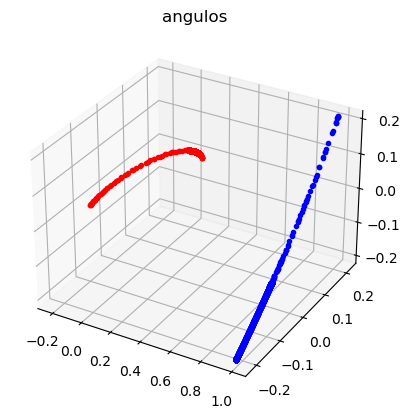

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('angulos') 
x1 = -L1*sin(angulobrazo)
y1 = L1*cos(angulobrazo)

a = L1*cos(angulopendulo)
x2=cos(a)
y2=sin(a)
ax.plot3D(x1,y1, 'r.', label = 'brazo')
ax.plot3D(x2,y2,a, 'b.', label = 'pendulo')



In [25]:

y1 = velocidadbrazo
y3 = velocidadpendulo
y0 = np.degrees(angulobrazo)
#y0=  vlib1.angulogrados(y0)
#y0=angulobrazo
y2 = np.degrees(angulopendulo)
#y2=  vlib1.angulogrados(y2)
#y2=angulopendulo


y4= tautotal



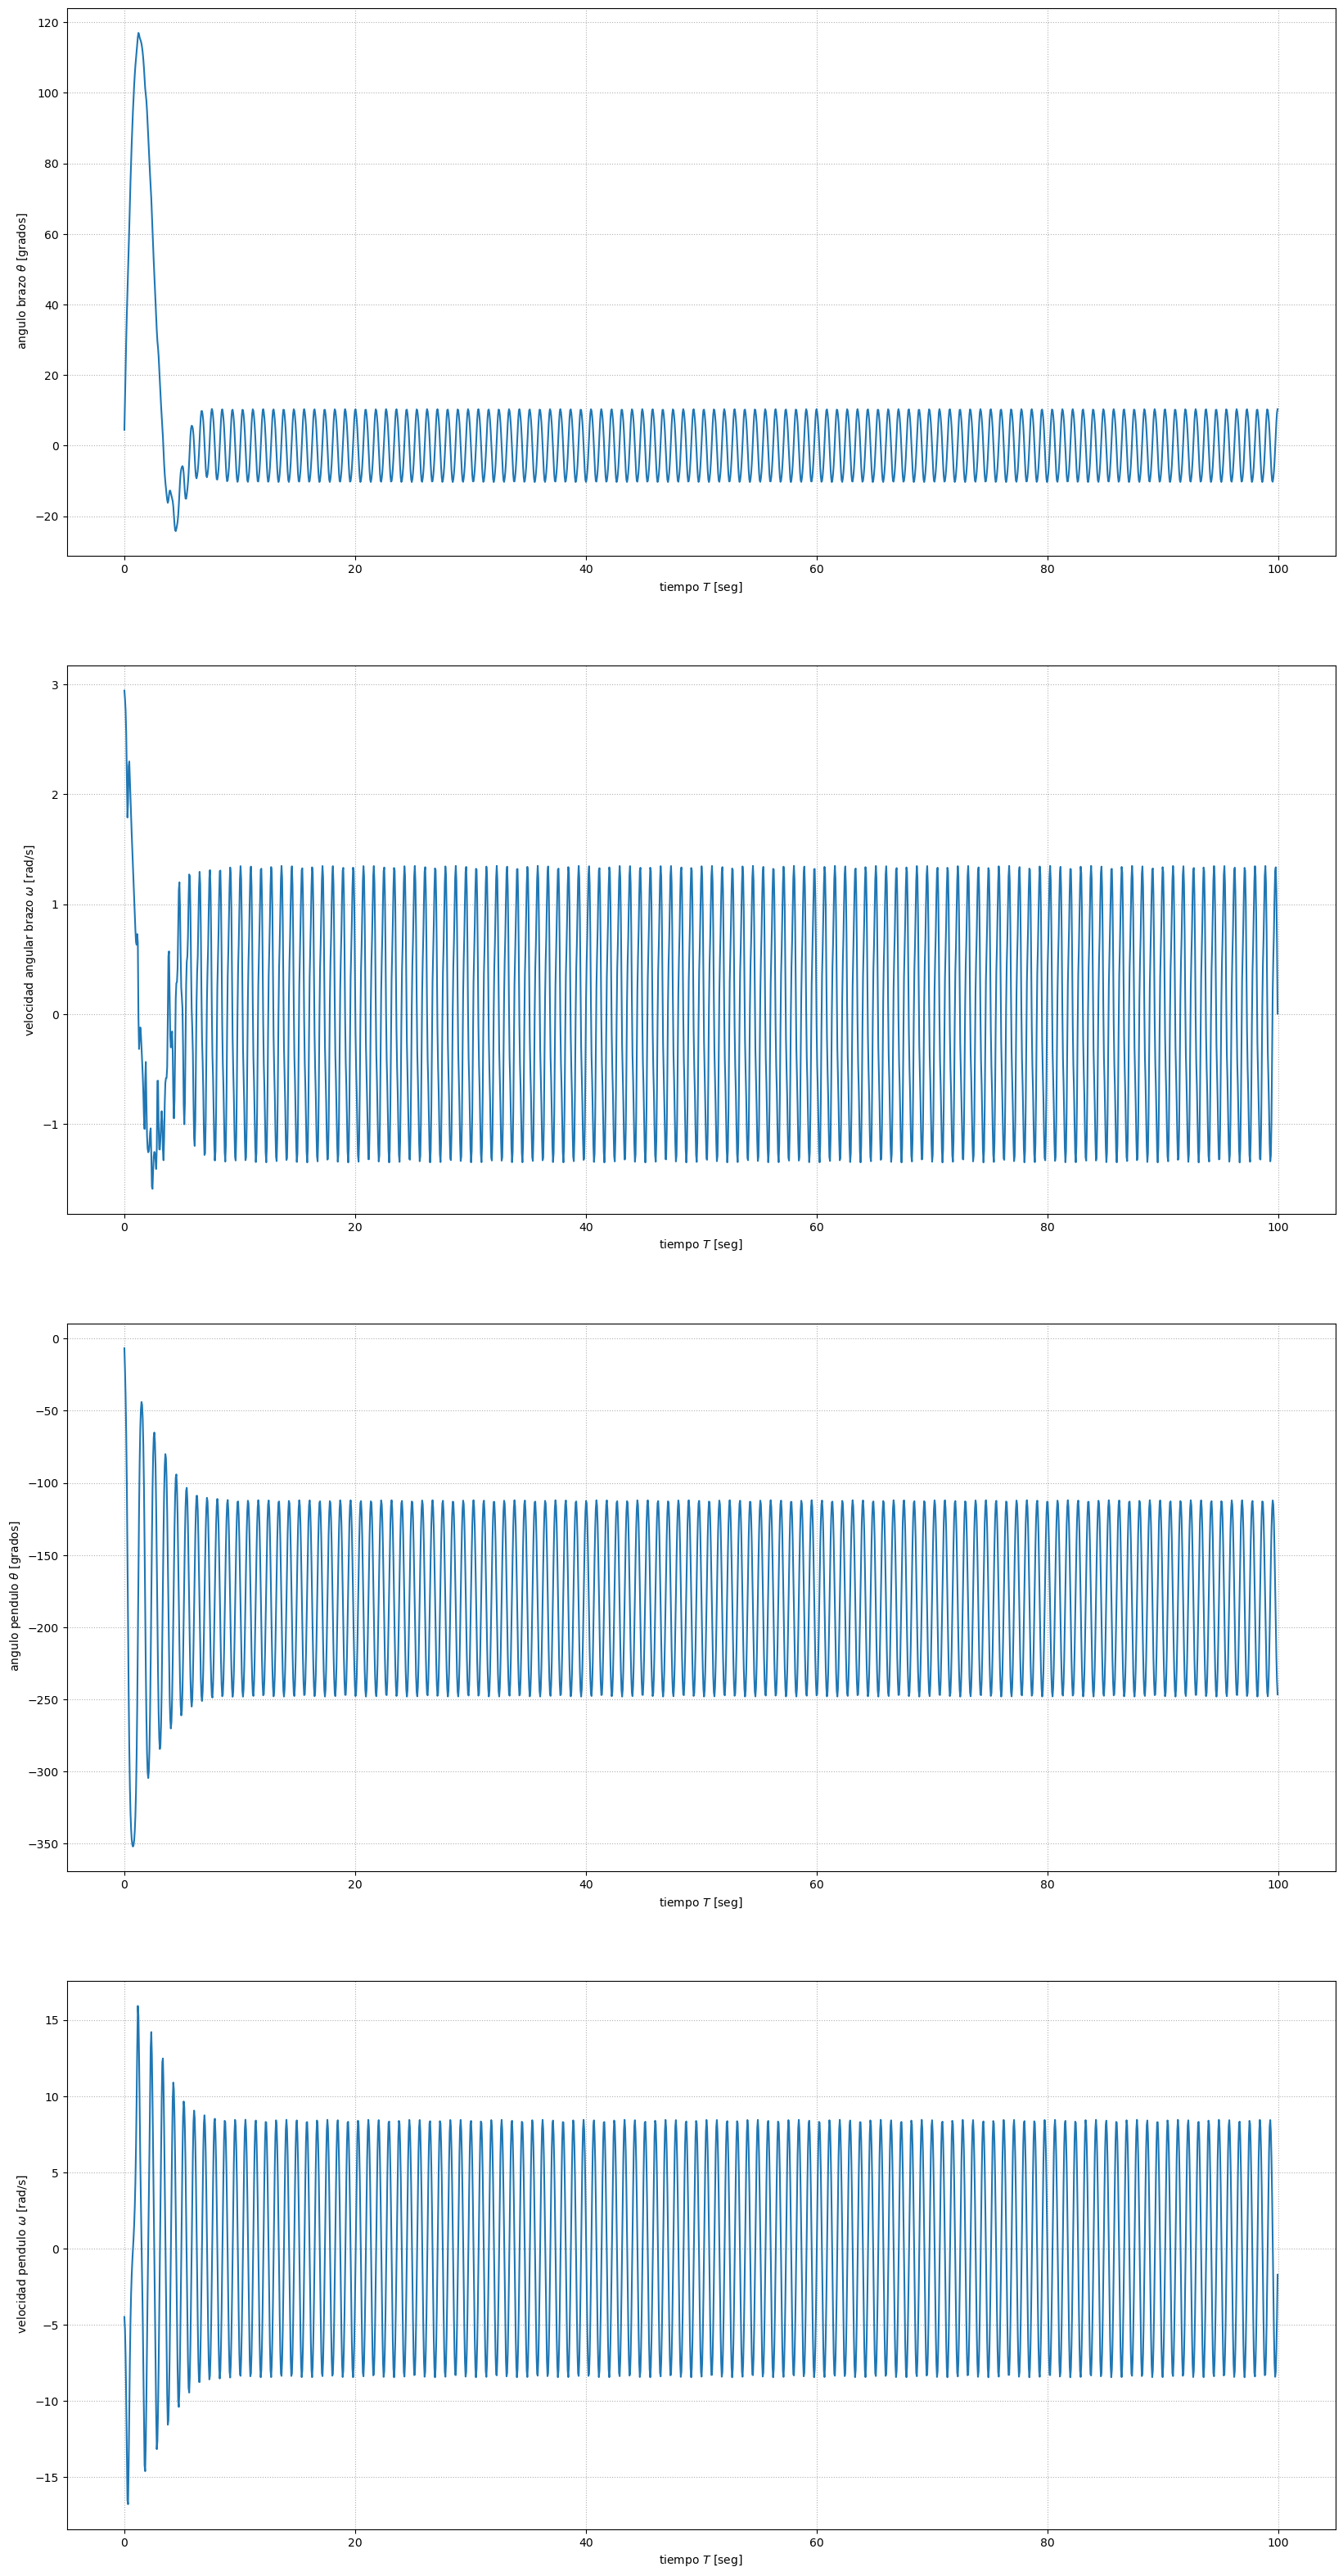

In [26]:
fig, axes = plt.subplots(4,1,figsize=(20, 40))


ax = axes[0]
omega=t
ax.plot(omega,y0)
ax.set_xlabel(r'tiempo $T$ [seg]')
ax.set_ylabel(r' angulo brazo $\theta$ [grados]')
ax.grid(True, linestyle='dotted')



ax = axes[1]
omega=t
ax.plot(omega, y1)
ax.set_xlabel(r'tiempo $T$ [seg]')
ax.set_ylabel(r'velocidad angular brazo $\omega$ [rad/s]')
ax.grid(True, linestyle='dotted')

ax = axes[2]
omega=t
ax.plot(omega,y2)
ax.set_xlabel(r'tiempo $T$ [seg]')
ax.set_ylabel(r' angulo pendulo $\theta$ [grados]')
ax.grid(True, linestyle='dotted')

ax = axes[3]
omega=t
ax.plot(omega,y3 )
ax.set_xlabel(r'tiempo $T$ [seg]')
ax.set_ylabel(r' velocidad pendulo $\omega$ [rad/s]')
ax.grid(True, linestyle='dotted')



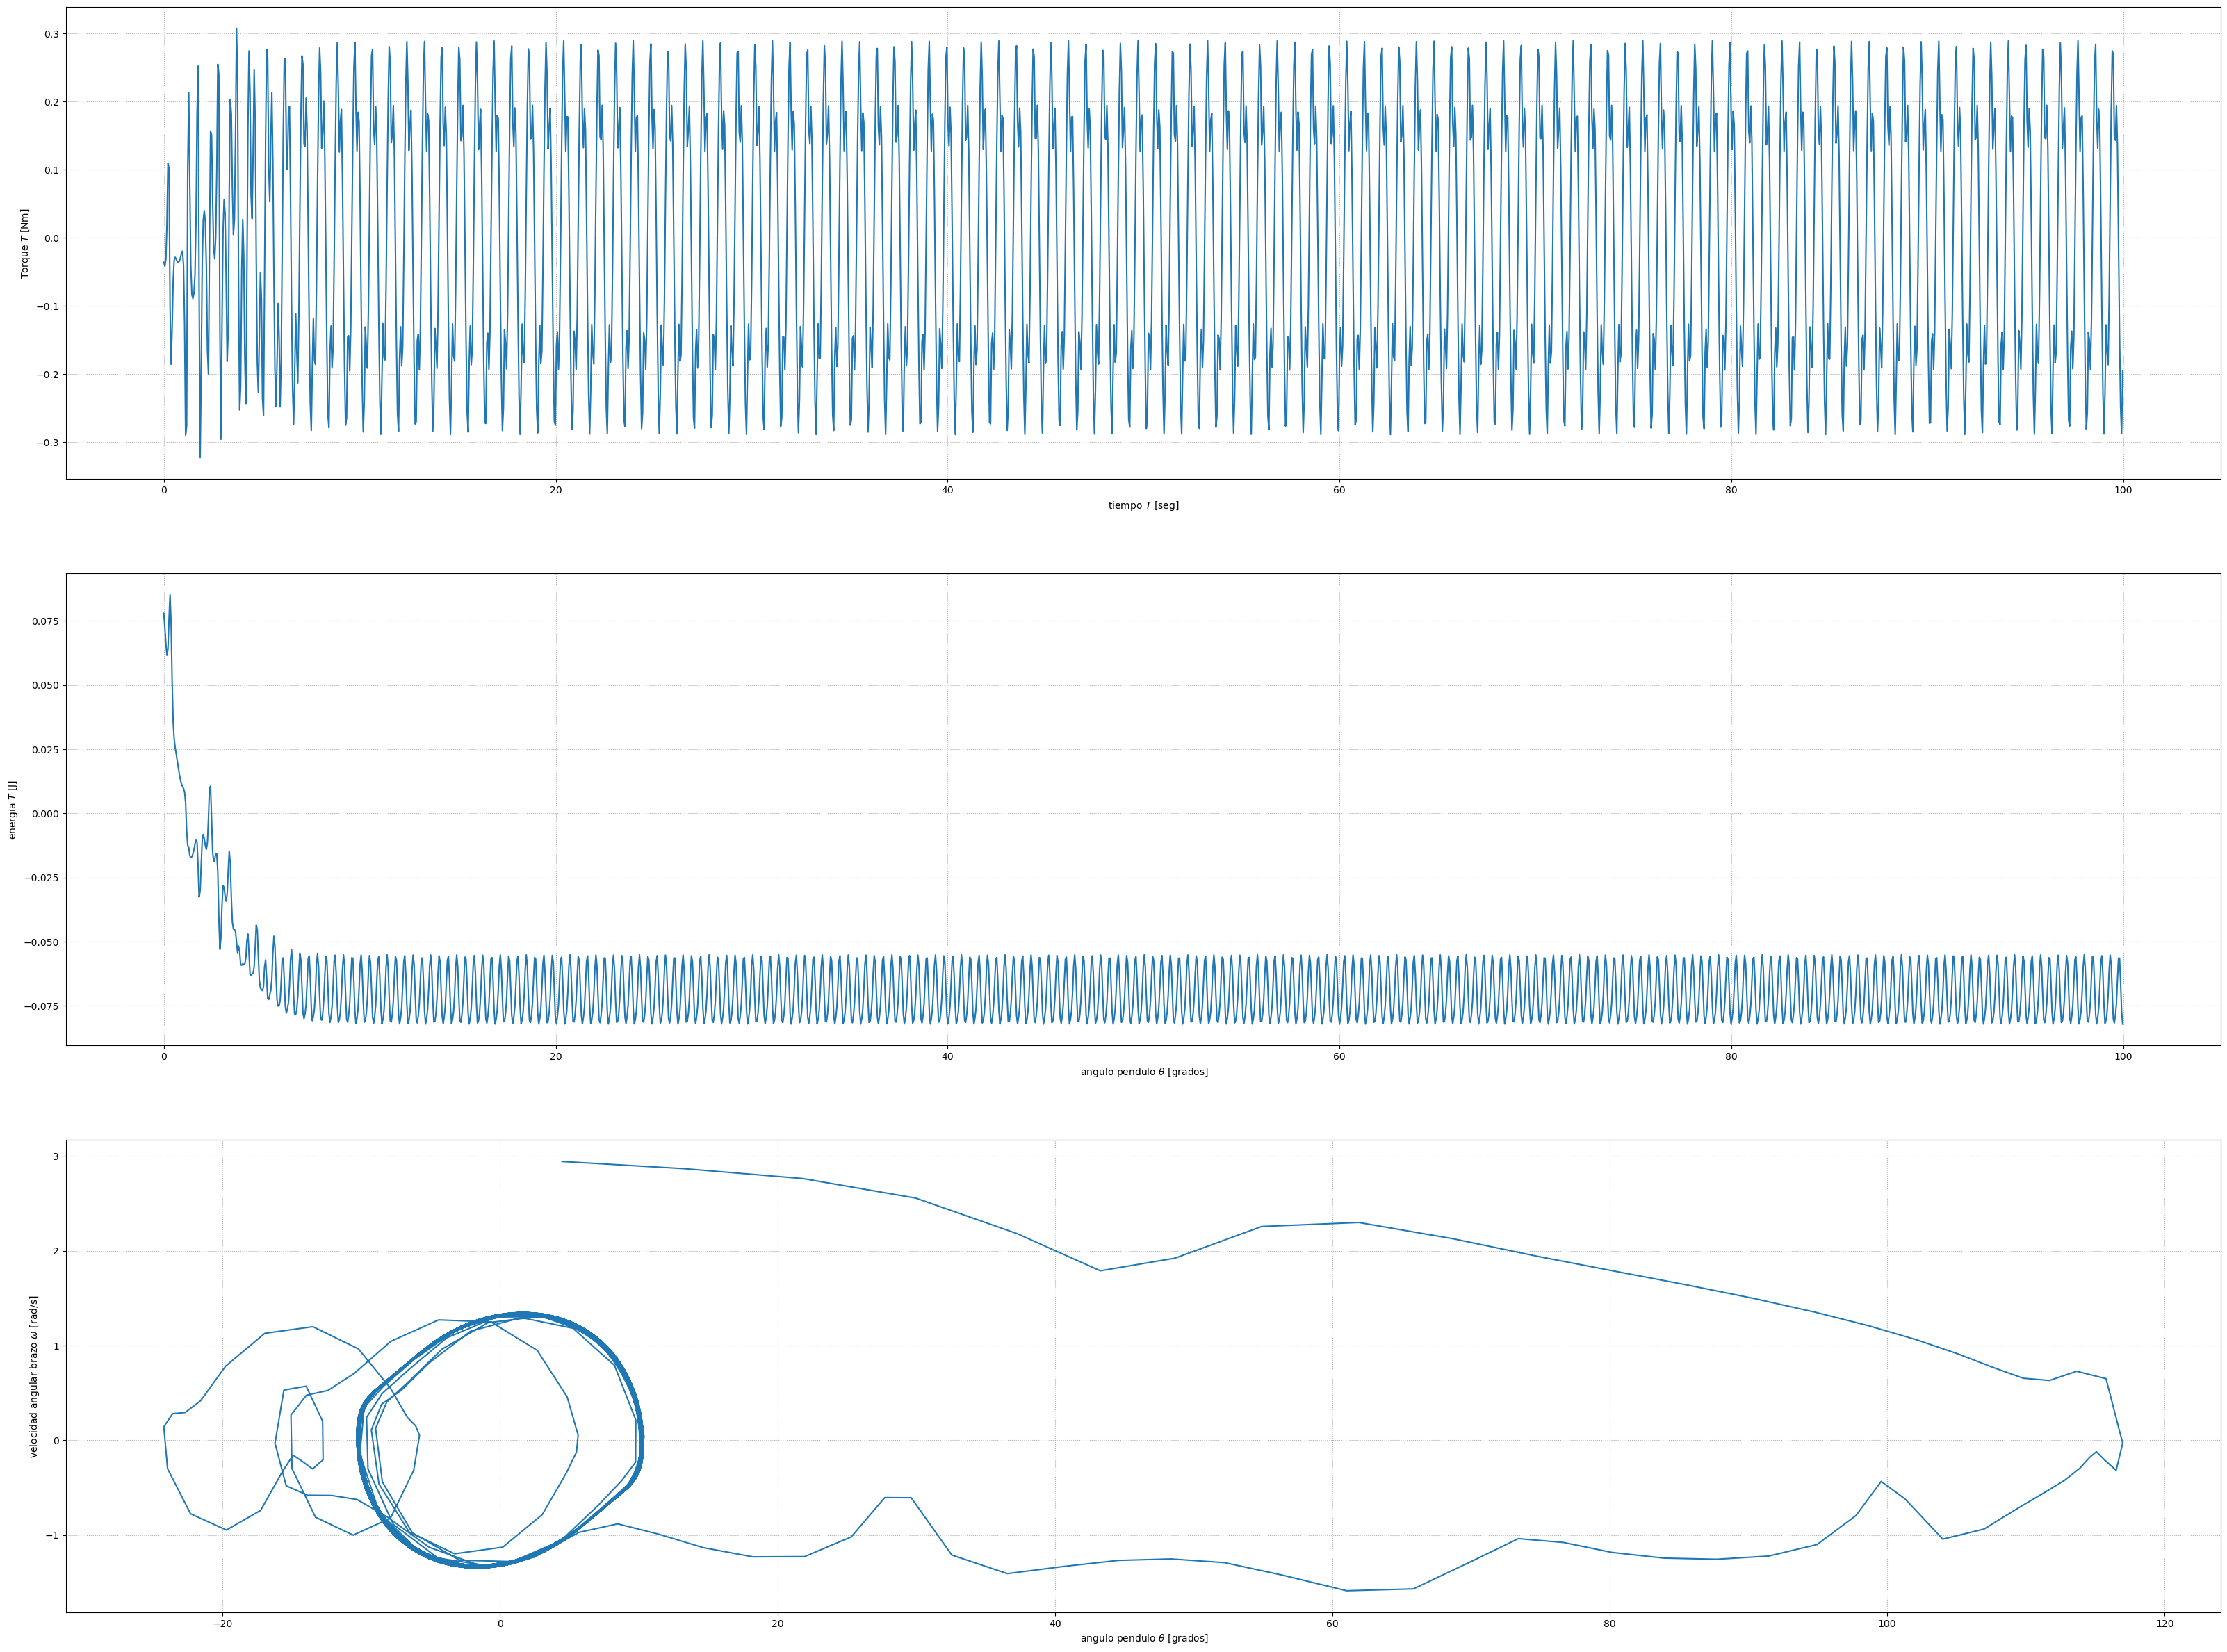

In [27]:
fig, axes = plt.subplots(3,1,figsize=(40, 30))




ax = axes[0]

omega=t
ax.plot(omega, tautotal)
ax.set_xlabel(r'tiempo $T$ [seg]')
ax.set_ylabel('Torque $T$ [Nm]')
ax.grid(True, linestyle='dotted')

 
ax = axes[1]
omega=t
ax.plot(omega,Energia )
ax.set_xlabel(r' angulo pendulo $\theta$ [grados]')
ax.set_ylabel('energia $T$ [J]')
ax.grid(True, linestyle='dotted')


ax = axes[2]
ax.plot(y0, y1)
ax.set_xlabel(r' angulo pendulo $\theta$ [grados]')
ax.set_ylabel(r'velocidad angular brazo $\omega$ [rad/s]')
ax.grid(True, linestyle='dotted')





